In [2]:
!pip install seaborn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.9/294.9 kB 1.5 MB/s eta 0:00:00a 0:00:01


In [30]:
!pip install wordcloud

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 168.4/168.4 kB 1.6 MB/s eta 0:00:00a 0:00:01


In [4]:
!pip install jupyterthemes

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.0/7.0 MB 5.2 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.7/46.7 kB 1.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.6/49.6 kB 1.6 MB/s eta 0:00:00


In [36]:
!pip install nltk

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 1.9 MB/s eta 0:00:0000:0100:010m


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from jupyterthemes import jtplot
jtplot.style(theme='monokai', context='notebook', ticks=True, grid=False) 

In [31]:
from wordcloud import WordCloud

In [34]:
import string

In [37]:
import nltk

In [6]:
tweet_df = pd.read_csv("twitter.csv")

In [7]:
tweet_df.head()

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


In [8]:
tweet_df.describe()

,id,label
count,31962.000000,31962.000000
mean,15981.500000,0.070146
std,9226.778988,0.255397
min,1.000000,0.000000
25%,7991.250000,0.000000
50%,15981.500000,0.000000
75%,23971.750000,0.000000
max,31962.000000,1.000000


In [11]:
tweet_df["tweet"]

0         @user when a father is dysfunctional and is s...
1        @user @user thanks for #lyft credit i can't us...
2                                      bihday your majesty
3        #model   i love u take with u all the time in ...
4                   factsguide: society now    #motivation
                               ...                        
31957    ate @user isz that youuu?ðððððð...
31958      to see nina turner on the airwaves trying to...
31959    listening to sad songs on a monday morning otw...
31960    @user #sikh #temple vandalised in in #calgary,...
31961                     thank you @user for you follow  
Name: tweet, Length: 31962, dtype: object

In [17]:
tweet_df = tweet_df.drop(["id"],axis =1 )

<Axes: >

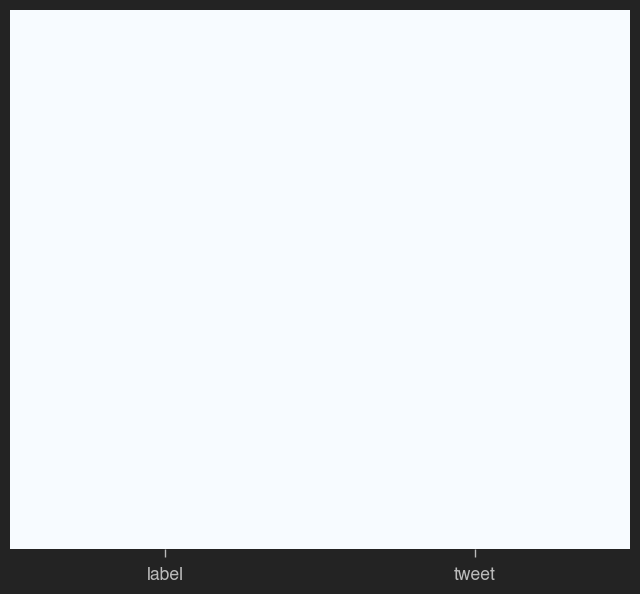

In [18]:
sns.heatmap(tweet_df.isnull(),yticklabels = False,cbar = False,cmap = "Blues")

array([[<Axes: title={'center': 'label'}>]], dtype=object)

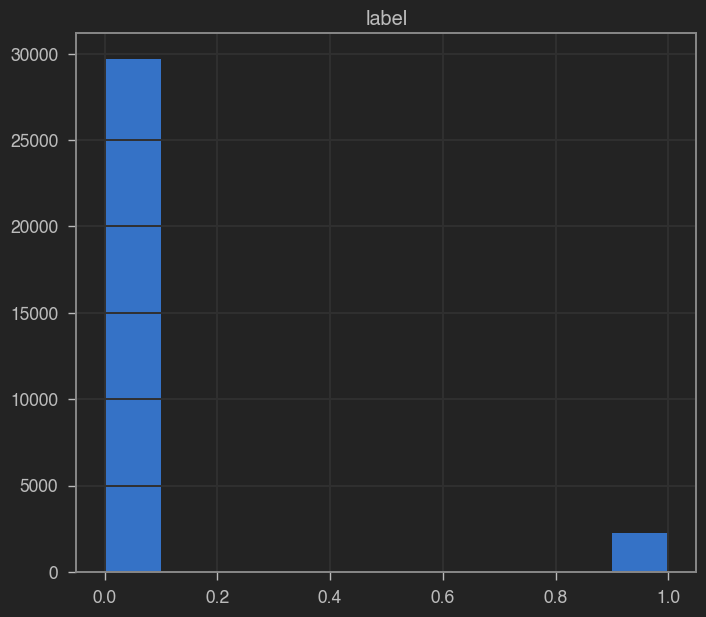

In [19]:
tweet_df.hist()

<Axes: ylabel='count'>

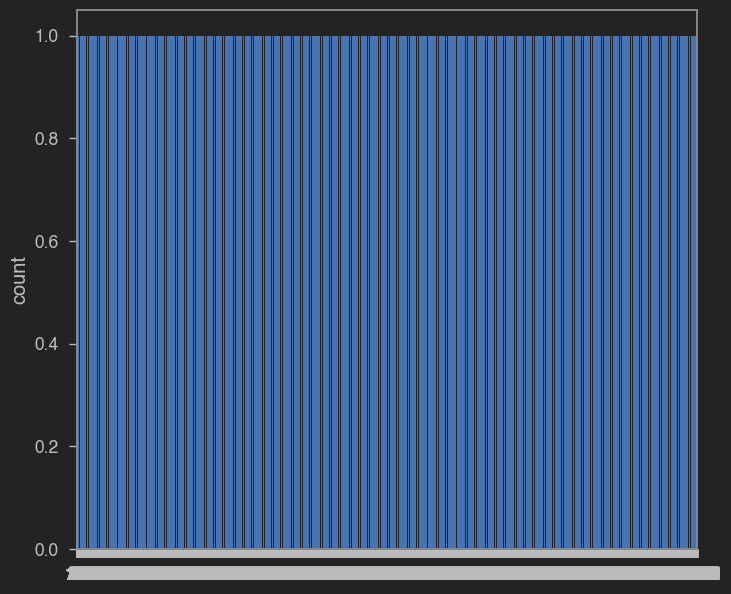

In [20]:
sns.countplot(tweet_df["label"],label = "Count")

In [21]:
tweet_df["length"] = tweet_df["tweet"].apply(len)

In [22]:
tweet_df

,label,tweet,length
0,0,@user when a father is dysfunctional and is s...,102
1,0,@user @user thanks for #lyft credit i can't us...,122
2,0,bihday your majesty,21
3,0,#model i love u take with u all the time in ...,86
4,0,factsguide: society now #motivation,39
...,...,...,...
31957,0,ate @user isz that youuu?ðððððð...,68
31958,0,to see nina turner on the airwaves trying to...,131
31959,0,listening to sad songs on a monday morning otw...,63
31960,1,"@user #sikh #temple vandalised in in #calgary,...",67


In [23]:
tweet_df[tweet_df["length"] == 84]["tweet"]

43       my mom shares the same bihday as @user   bihda...
220      g o a l s ð repost from @user #propey #ocea...
640      oscar tabarez talks luis suarezâs angry reac...
723       @user another hands &amp; feet complete!! ber...
742      because great things never came from comfo zon...
                               ...                        
31445    .@user on making choices to keep herself   as ...
31448    i'm a gordo. #passpo #florence #firenze #italy...
31509    just 3 keys that are found on your computer to...
31857    traveling happy #family   holidays #car #sunny...
31883    we spent #familytime by doing simple wefie, we...
Name: tweet, Length: 333, dtype: object

<Axes: ylabel='Frequency'>

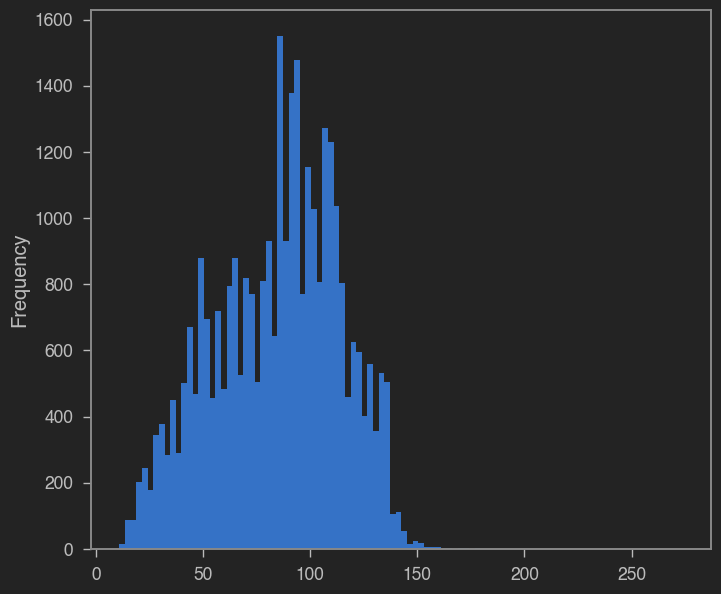

In [25]:
tweet_df["length"].plot(bins = 100, kind = "hist")

In [26]:
positive_tweets = tweet_df[tweet_df["label"]==0]

In [27]:
negative_tweets = tweet_df[tweet_df["label"]==1]

In [28]:
sentences = tweet_df['tweet'].tolist()
len(sentences)

31962

In [29]:
sentences_as_one_string =" ".join(sentences)

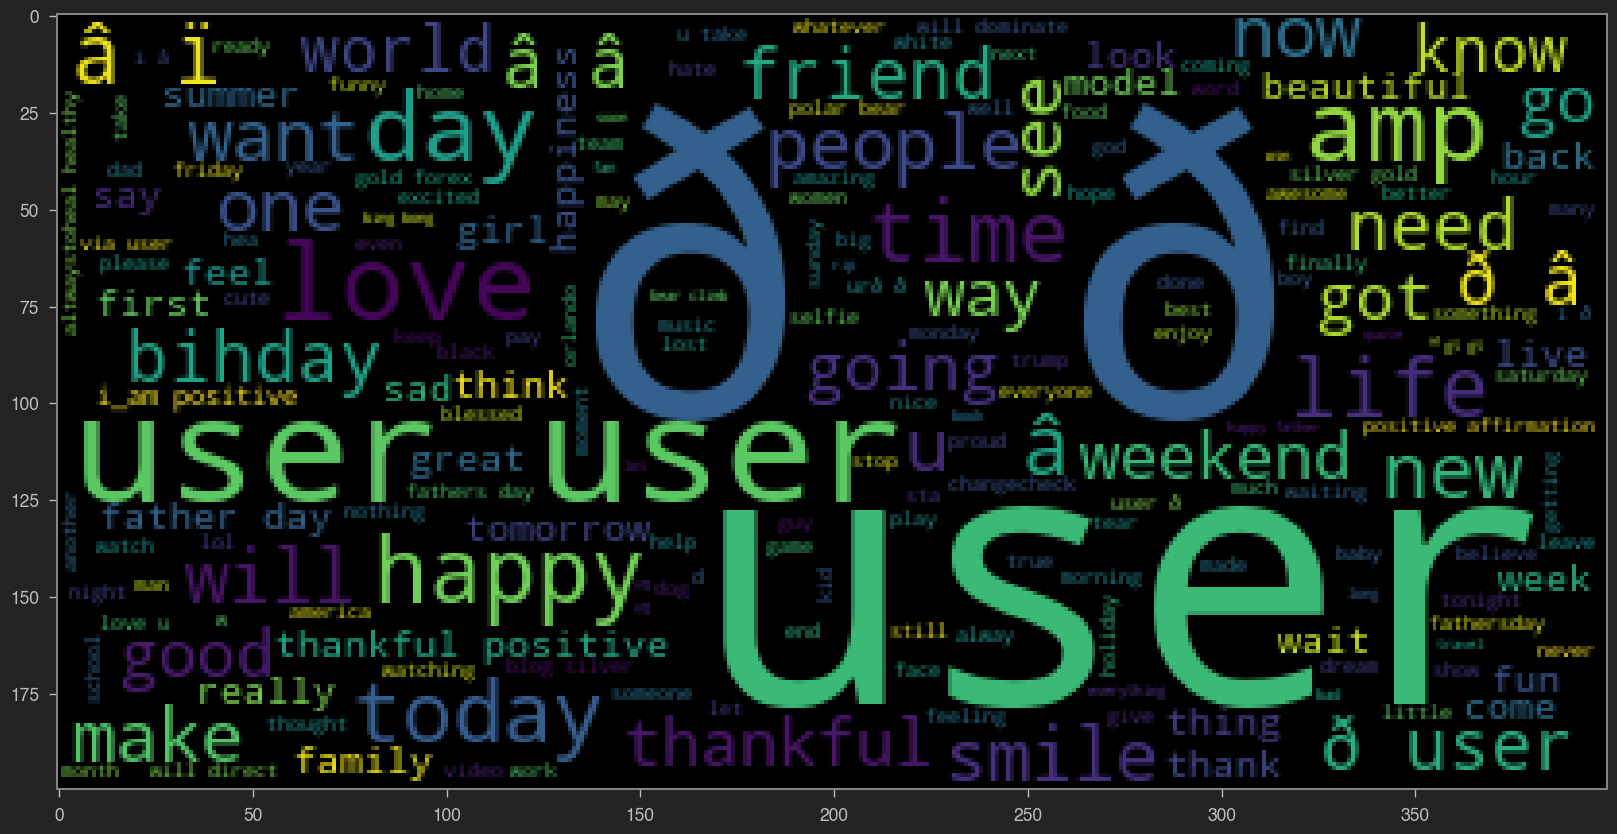

In [32]:
plt.figure(figsize=(20,20))
plt.imshow(WordCloud().generate(sentences_as_one_string))

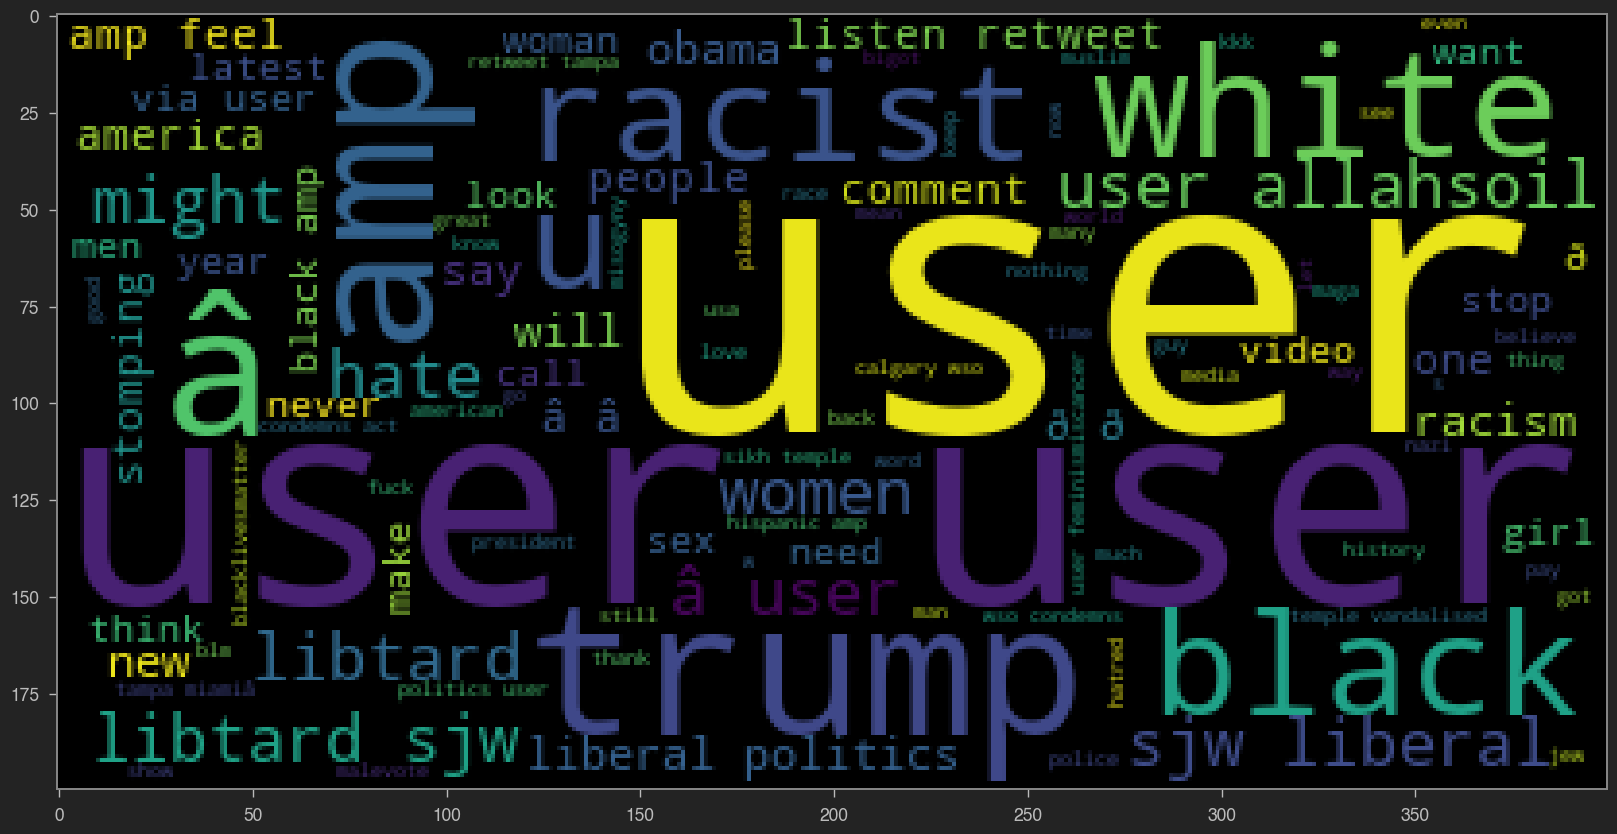

In [33]:
negative_sentence = negative_tweets["tweet"].tolist()
neg_as_a_string = " ".join(negative_sentence)
plt.figure(figsize=(20,20))
plt.imshow(WordCloud().generate(neg_as_a_string))

In [39]:
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/adityaap/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [40]:
from nltk.corpus import stopwords

In [41]:
from sklearn.feature_extraction.text import CountVectorizer
sample_data = ['This is the first paper.','This document is the second paper.','And this is the third one.','Is this the first paper?']

In [42]:
vectorizer = CountVectorizer()

In [43]:
X = vectorizer.fit_transform(sample_data)

In [47]:
print(X.toarray()) 

[[0 0 1 1 0 1 0 1 0 1]
 [0 1 0 1 0 1 1 1 0 1]
 [1 0 0 1 1 0 0 1 1 1]
 [0 0 1 1 0 1 0 1 0 1]]


In [48]:
def message_cleaning(message):
    Test_punc_removed = [char for char in message if char not in string.punctuation]
    Test_punc_removed_join = ''.join(Test_punc_removed)
    Test_punc_removed_join_clean = [word for word in Test_punc_removed_join.split() if word.lower() not in stopwords.words('english')]
    return Test_punc_removed_join_clean

In [49]:
tweet_df_clean = tweet_df['tweet'].apply(message_cleaning)

In [50]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(analyzer = message_cleaning, dtype = np.uint8)
tweets_countvectorizer = vectorizer.fit_transform(tweet_df['tweet'])

In [51]:
print(vectorizer.get_feature_names_out())

['0' '0000001' '00027' ... 'ó¾°\x80'
 'ó¾°\x80ó¾\x8d\x92ó¾\x86\x9fó¾\x86¤ó¾®\x9fó¾\x92ºó¾®\x9eó¾\x94\x9bó¾\x94\x83ó¾\x95\x86'
 'ó¾°\x80ó¾°\x80ó¾°\x80']


In [52]:
X = pd.DataFrame(tweets_countvectorizer.toarray())

In [53]:
y = tweet_df['label']

In [54]:
X.shape

(31962, 47386)

In [55]:
y.shape

(31962,)

In [57]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2)

In [58]:
from sklearn.naive_bayes import MultinomialNB

In [59]:
NB_classified = MultinomialNB()

In [60]:
NB_classified.fit(X_train,y_train)

MultinomialNB()

In [62]:
from sklearn.metrics import classification_report,confusion_matrix

<Axes: >

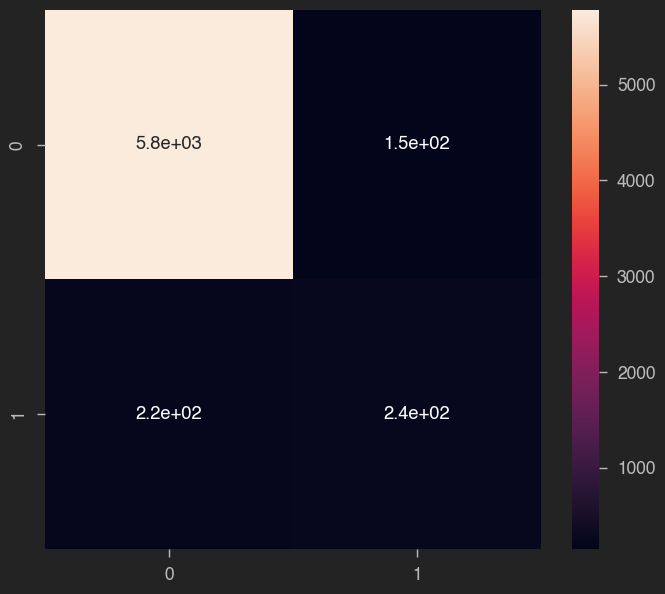

In [63]:
y_pred = NB_classified.predict(X_test)
cm = confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot = True)

In [64]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.96      0.97      0.97      5932
           1       0.62      0.53      0.57       461

    accuracy                           0.94      6393
   macro avg       0.79      0.75      0.77      6393
weighted avg       0.94      0.94      0.94      6393

